In [258]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = 'pharmaceutical-sales-demand.xlsx'
pharma_df = pd.read_excel(data)

In [259]:
import datetime

In [260]:
num2month = { "01":"jan", "02":"feb","03":"mar","04":"apr",
                "05":"may", "06":'jun', "07":"jul", "08": "Aug",
                "09":"Sep", "10":"Oct", "11":"Nov", "12": "Dec"}

def create_month(df, num2month = num2month):
    dt = str(df).split("-")
    return num2month[dt[1]]

In [261]:
pharma_df.sort_values(by = "Date", inplace= True)
pharma_df.reset_index(inplace= True)
pharma_df['month'] = pharma_df['Date'].map(create_month)

In [262]:
pharma_df

,index,Date,Product ID,Stock Demand,month
0,62627,2020-10-01,1O0SN,1,Oct
1,4137,2020-10-01,E33NS,1,Oct
2,81910,2020-10-01,0S1OR,90,Oct
3,50643,2020-10-01,004IV,61,Oct
4,50647,2020-10-01,21GUL,2,Oct
...,...,...,...,...,...
1048570,1012092,2021-07-31,I0LP1,4,jul
1048571,1039877,2021-07-31,P03AM,1,jul
1048572,1036755,2021-07-31,R39OI,2,jul
1048573,1039684,2021-07-31,0XDY3,30,jul


In [263]:
from cmath import nan

def remove_datetime(item):
    if type(item) == str:
        return item
    else:
       print("wrong_format {}".format(type(item)))
       return None

pharma_df['Product ID'] = pharma_df['Product ID'].map(remove_datetime)
pharma_df = pharma_df.dropna()
pharma_df

wrong_format <class 'datetime.datetime'>
wrong_format <class 'datetime.datetime'>
wrong_format <class 'datetime.datetime'>
wrong_format <class 'datetime.datetime'>
wrong_format <class 'datetime.datetime'>
wrong_format <class 'datetime.datetime'>
wrong_format <class 'datetime.datetime'>
wrong_format <class 'datetime.datetime'>
wrong_format <class 'datetime.datetime'>
wrong_format <class 'datetime.datetime'>
wrong_format <class 'datetime.datetime'>
wrong_format <class 'datetime.datetime'>
wrong_format <class 'datetime.datetime'>
wrong_format <class 'datetime.datetime'>
wrong_format <class 'datetime.datetime'>
wrong_format <class 'datetime.datetime'>
wrong_format <class 'datetime.datetime'>
wrong_format <class 'datetime.datetime'>
wrong_format <class 'datetime.datetime'>
wrong_format <class 'datetime.datetime'>
wrong_format <class 'datetime.datetime'>
wrong_format <class 'datetime.datetime'>
wrong_format <class 'datetime.datetime'>
wrong_format <class 'datetime.datetime'>
wrong_format <cl

,index,Date,Product ID,Stock Demand,month
0,62627,2020-10-01,1O0SN,1,Oct
1,4137,2020-10-01,E33NS,1,Oct
2,81910,2020-10-01,0S1OR,90,Oct
3,50643,2020-10-01,004IV,61,Oct
4,50647,2020-10-01,21GUL,2,Oct
...,...,...,...,...,...
1048570,1012092,2021-07-31,I0LP1,4,jul
1048571,1039877,2021-07-31,P03AM,1,jul
1048572,1036755,2021-07-31,R39OI,2,jul
1048573,1039684,2021-07-31,0XDY3,30,jul


In [264]:
'None' in set(pharma_df['Product ID'])

False

In [265]:
#pharma_df = pharma_df.filter(regex='\w{5,8}', axis = 0).sort_values(by = 'Date')

In [266]:
# Adding new features
# Adding categories of products can help detect change in demand, perhaps due to alternative products
# Adding price of items can also help detect if demand reduced because of price rise 
#It can be seen that stock demand was not taken on a consistent frequency each month. Thus we this can lead to inconsistencies while projecting

In [267]:
#Displaying sum of stock demand by each month 
yearly_demand_df = pharma_df.pivot_table(['Stock Demand'], index = 'Product ID', columns = 'month',aggfunc= sum)

In [268]:
yearly_demand_df = yearly_demand_df.droplevel(None, axis = 1)
yearly_demand_df = pd.DataFrame(yearly_demand_df, columns = ['Dec', 'Nov', 'Oct', 'apr', 'feb', 'jan', 'jul', 'mar', 'may'])

In [269]:
trans = yearly_demand_df.transpose()

In [270]:
trans.loc[trans['H0N7'] == 275200].index[0]

'Nov'

In [271]:
#Displays max demand of eat item over 12 months 

max_item_df = pd.DataFrame(yearly_demand_df.max(axis = 1), columns= ["Max Value(12 months)"]) #Obtaining months with maximum Stock Demand
max_item_df.reset_index(inplace= True)
max_item_df.sort_values(by = 'Max Value(12 months)', ascending = False, inplace= True) #In order to predict demand for top selling products
max_item_df = max_item_df.dropna()
max_item_df

,Product ID,Max Value(12 months)
200,03RAA,422246.0
5887,N8188,375338.0
3548,A03VX,290188.0
4866,H0N7,275200.0
5800,N0U4R,224162.0
...,...,...
151,02I0M,-5.0
107,01SFR,-10.0
1922,2AR4U,-25.0
5210,IDT10,-43.0


In [272]:
def check_month(id, number):
    """Checks the month which has the maximum sales of a product"""
    index = trans.loc[trans[id] == number].index
    return index[0]

max_item_df['month'] = [check_month(i,j) for i,j in zip(max_item_df['Product ID'], max_item_df['Max Value(12 months)'])]
#Shows month where each item had maximum stock demand

In [273]:
max_item_df

,Product ID,Max Value(12 months),month
200,03RAA,422246.0,jan
5887,N8188,375338.0,Oct
3548,A03VX,290188.0,Nov
4866,H0N7,275200.0,Nov
5800,N0U4R,224162.0,jan
...,...,...,...
151,02I0M,-5.0,Nov
107,01SFR,-10.0,jul
1922,2AR4U,-25.0,mar
5210,IDT10,-43.0,Oct


In [274]:
avg_item_df = pd.DataFrame(yearly_demand_df.mean(axis = 1), columns= ["Average Value(12 months)"]) #Obtaining months with maximum Stock Demand
avg_item_df.reset_index(inplace= True)
avg_item_df.sort_values(by = 'Average Value(12 months)', ascending = False, inplace= True) #In order to predict demand for top selling products
avg_item_df

,Product ID,Average Value(12 months)
4866,H0N7,164751.111111
3676,A2SN0,115364.111111
5887,N8188,112865.333333
200,03RAA,104850.222222
3548,A03VX,74319.000000
...,...,...
5531,LASAC,NaN
5651,M11LP,NaN
6042,O0FA2,NaN
7298,T3I0T,NaN


In [275]:
min_item_df = pd.DataFrame(yearly_demand_df.min(axis = 1), columns= ["Min Value(12 months)"]) #Obtaining months with maximum Stock Demand
min_item_df.reset_index(inplace= True)
min_item_df.sort_values(by = 'Min Value(12 months)', ascending = False, inplace= True) #In order to predict demand for low selling products
min_item_df = min_item_df.dropna()
min_item_df

,Product ID,Min Value(12 months)
3676,A2SN0,65943.0
12,011ER,42514.0
5605,LP20H,29450.0
767,0NE1B,26126.0
7377,TER10,24665.0
...,...,...
5096,I50MG,-1064.0
7645,VL1O0,-1099.0
1685,1S0YS,-1826.0
7545,UOSTC,-4655.0


In [276]:
min_item_df['month'] = [check_month(i,j) for i,j in zip(min_item_df['Product ID'], min_item_df['Min Value(12 months)'])]
min_item_df

#Shows month where each item had minimum stock demand

,Product ID,Min Value(12 months),month
3676,A2SN0,65943.0,jul
12,011ER,42514.0,jul
5605,LP20H,29450.0,mar
767,0NE1B,26126.0,jul
7377,TER10,24665.0,jul
...,...,...,...
5096,I50MG,-1064.0,jan
7645,VL1O0,-1099.0,jul
1685,1S0YS,-1826.0,apr
7545,UOSTC,-4655.0,may


FILTER BY PRODUCT

In [277]:
products = list(pharma_df['Product ID'].unique())

#Creating dataframe for each product ID
#I6D04
prod_1 = pharma_df[pharma_df['Product ID'] == products[0]]
prod_1 = prod_1.sort_values(by = "Date")
prod_1

,index,Date,Product ID,Stock Demand,month
0,62627,2020-10-01,1O0SN,1,Oct
7071,49274,2020-10-02,1O0SN,1,Oct
13896,9066,2020-10-05,1O0SN,7,Oct
16682,19652,2020-10-06,1O0SN,6,Oct
33082,112288,2020-10-09,1O0SN,14,Oct
...,...,...,...,...,...
998245,898088,2021-06-29,1O0SN,10,jun
1000880,969317,2021-06-30,1O0SN,6,jun
1012585,1009864,2021-07-06,1O0SN,10,jul
1043226,1033536,2021-07-28,1O0SN,2,jul


In [278]:
products

['1O0SN',
 'E33NS',
 '0S1OR',
 '004IV',
 '21GUL',
 'CY1C0',
 '2IV01',
 'LE1C0',
 'B10LU',
 '1NU0S',
 'AOX09',
 '1FZ0E',
 'XPO20',
 'YD10A',
 'HY0P1',
 'N0SI1',
 'OK9L1',
 '1R33I',
 '7I4R8',
 'LIP40',
 'C2EA0',
 'GE10M',
 '3OPT0',
 'ZC25D',
 'N8UO0',
 'AN4D0',
 'O2P01',
 '5LI1V',
 '8DUC0',
 'AV0E5',
 '0FE1E',
 '23RAH',
 '3R0UG',
 'TR1A0',
 'LI0A4',
 '33INI',
 '0ME1O',
 '1R0MY',
 '3M0OR',
 'ET30C',
 'LAB03',
 'R10PO',
 '1CAL9',
 'R0IO1',
 '0A5CM',
 '2001R',
 '30FOS',
 '0B2XI',
 'CL01I',
 'R20TA',
 'GAM05',
 '8RI49',
 '67I7R',
 '9R7I5',
 '0NCO2',
 'C10RO',
 '3R7I6',
 'R461I',
 'NE0B1',
 'E02XF',
 'A01DI',
 'O1R0U',
 '120EC',
 'R2B0I',
 '0EB5T',
 'OO05L',
 'SC5E5',
 'A0L2C',
 '3CE11',
 'E1SC3',
 'I2LI0',
 '1P0AR',
 'CS54E',
 'V0R1Y',
 'P5O2D',
 'RP06O',
 'V3EA0',
 '0AL1L',
 'L0SA1',
 'MH3A0',
 'F1RI0',
 '0MYF1',
 '03REI',
 'OV40R',
 '5A0XL',
 '0OP1R',
 'UCT01',
 'I0A2D',
 'VL01A',
 '10EMK',
 '1IR16',
 'R7I35',
 'O0M4L',
 '2V1NO',
 '1S0PA',
 'S91OB',
 'O3L0A',
 '7N292',
 '2GM0E',
 'ALF02',


In [279]:
#Using previous stock count as features

for i in range(1, len(prod_1['index'])):
    prod_1[f'count- {i}'] = prod_1['Stock Demand'].shift(+i)


/var/folders/3v/kl4z85b17kd84k1hy0srlb3w0000gn/T/ipykernel_41229/1420684943.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prod_1[f'count- {i}'] = prod_1['Stock Demand'].shift(+i)
/var/folders/3v/kl4z85b17kd84k1hy0srlb3w0000gn/T/ipykernel_41229/1420684943.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prod_1[f'count- {i}'] = prod_1['Stock Demand'].shift(+i)
/var/folders/3v/kl4z85b17kd84k1hy0srlb3w0000gn/T/ipykernel_41229/1420684943.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of

In [280]:
prod_1.reset_index(inplace= True)

/var/folders/3v/kl4z85b17kd84k1hy0srlb3w0000gn/T/ipykernel_41229/3083661495.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prod_1.reset_index(inplace= True)


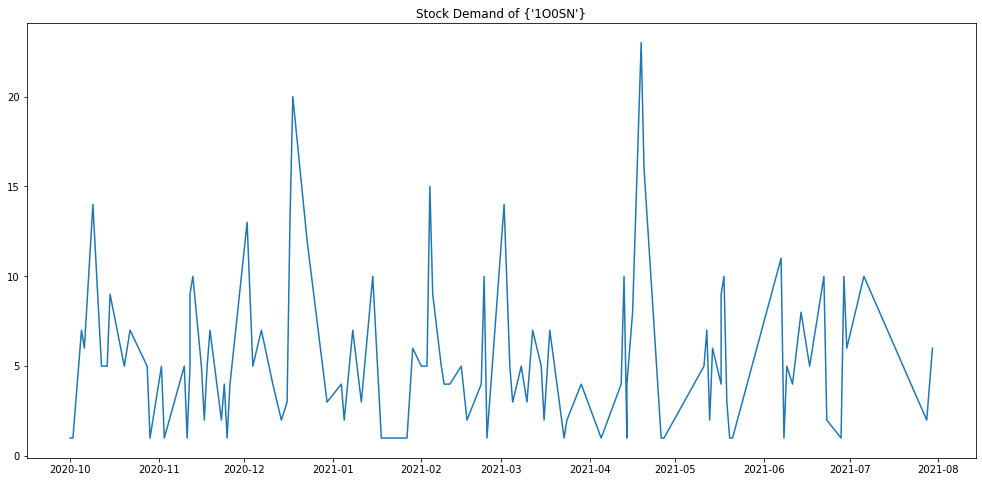

In [315]:
plt.figure(figsize=(17,8))
plt.plot(prod_1['Date'], prod_1['Stock Demand'] )
plt.title('Stock Demand of {}'.format(set(prod_1['Product ID'])))
plt.show()

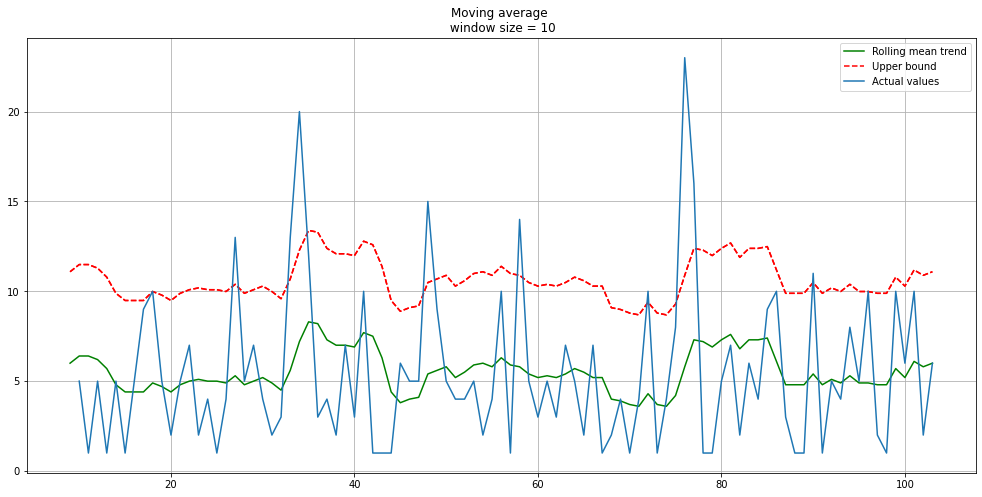

In [320]:
import numpy as np
from sklearn.metrics import mean_absolute_error

def plot_moving_average(series, window, plot_intervals = False, scale = 1.96):
    rolling_mean = series.rolling(window = window).mean()
    #Series in df
    plt.figure(figsize=(17,8))
    plt.title("Moving average \n window size = {}".format(window))
    plt.plot(rolling_mean, 'g', label = 'Rolling mean trend')

    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae - scale * deviation)
        upper_bound = rolling_mean - (mae - scale * deviation)
        plt.plot(upper_bound, 'r--', label = 'Upper bound')
        plt.plot(lower_bound, 'r--',)
    
    plt.plot(series[window:], label = 'Actual values')
    plt.legend(loc = 'best')
    plt.grid(True)

plot_moving_average(prod_1['Stock Demand'], 10, plot_intervals= True) #Stock Demand was not taken on a consistent basis which is why
#varying our window does not necessarily provide information on product performance weekly or monthly.

In [322]:
!pip install statsmodels

  Using cached statsmodels-0.13.2-cp38-cp38-macosx_11_0_arm64.whl (9.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 KB 2.1 MB/s eta 0:00:00a 0:00:01
You should consider upgrading via the '/Users/max/Desktop/Code/nlp_venv/bin/python3 -m pip install --upgrade pip' command.


/Users/max/Desktop/Code/nlp_venv/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/Users/max/Desktop/Code/nlp_venv/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


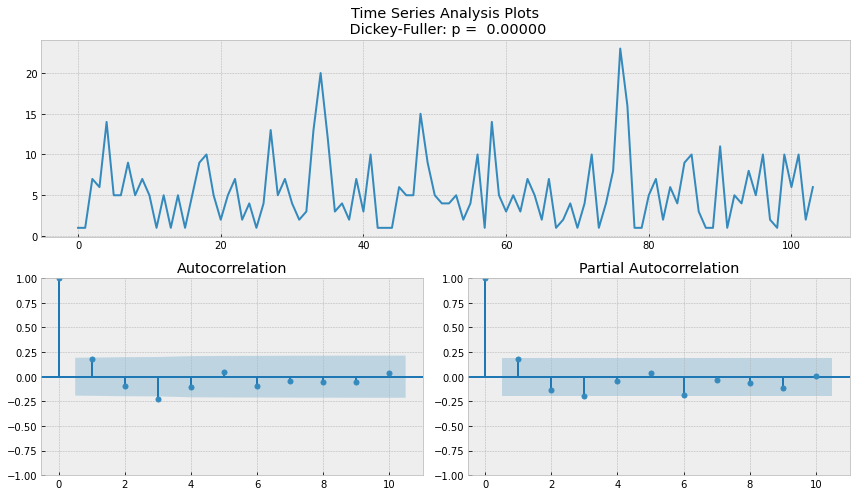

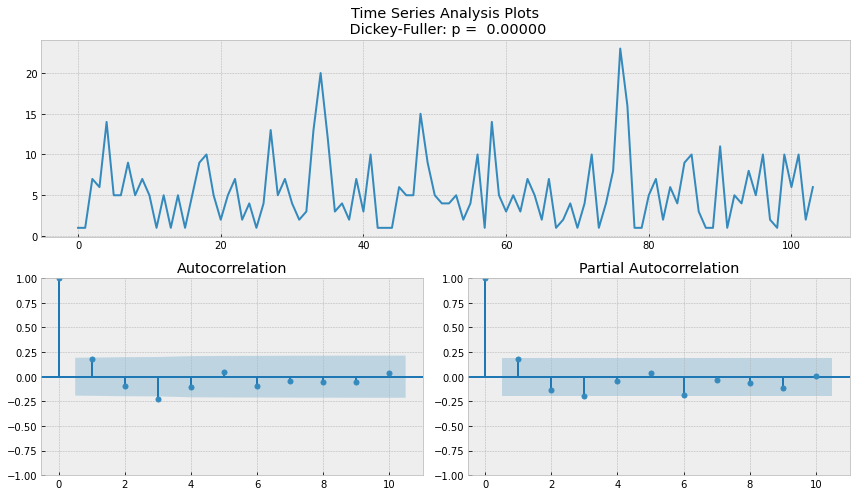

In [332]:
#Dickey Fuller's test to check correlation between plots

import statsmodels.tsa.api as smt
import statsmodels.api as sm

def tsplot(y, lags = None, figsize = (12,7), style = 'bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style = 'bmh'):
        fig = plt.figure(figsize = figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan = 2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))

        y.plot(ax = ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p = {0: .5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags = lags, ax = acf_ax)
        smt.graphics.plot_pacf(y, lags = lags, ax = pacf_ax)
        plt.tight_layout()

tsplot(prod_1['Stock Demand'], lags = 10)

daily_change = prod_1['Stock Demand'] - prod_1['Stock Demand'].shift(1)
tsplot(prod_1['Stock Demand'], lags = 10)

In [281]:
#Split first product into train and test 
from sklearn.model_selection import train_test_split

prod_1_train,prod_1_test = train_test_split(prod_1, test_size = 0.3, stratify= prod_1['month'])

In [282]:
prod_1_train

,level_0,index,Date,Product ID,Stock Demand,month,count- 1,count- 2,count- 3,count- 4,...,count- 94,count- 95,count- 96,count- 97,count- 98,count- 99,count- 100,count- 101,count- 102,count- 103
28,239715,312001,2020-12-04,1O0SN,5,Dec,13.0,4.0,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,274972,322043,2020-12-14,1O0SN,2,Dec,4.0,7.0,5.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,739842,734477,2021-04-20,1O0SN,16,apr,23.0,8.0,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,150237,214014,2020-11-10,1O0SN,5,Nov,1.0,5.0,1.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,163786,216846,2020-11-12,1O0SN,9,Nov,5.0,1.0,5.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,529389,486467,2021-02-24,1O0SN,1,feb,10.0,4.0,2.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,283269,323839,2020-12-16,1O0SN,3,Dec,2.0,4.0,7.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,1012585,1009864,2021-07-06,1O0SN,10,jul,6.0,10.0,1.0,2.0,...,9.0,5.0,5.0,14.0,6.0,7.0,1.0,1.0,NaN,NaN
6,49045,83020,2020-10-14,1O0SN,5,Oct,5.0,14.0,6.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [283]:
columns = list(prod_1_train.columns)

columns.remove('level_0')
columns.remove('index')
columns.remove('Date')
columns.remove('Stock Demand')
columns.remove('Product ID')


In [284]:
columns

['month',
 'count- 1',
 'count- 2',
 'count- 3',
 'count- 4',
 'count- 5',
 'count- 6',
 'count- 7',
 'count- 8',
 'count- 9',
 'count- 10',
 'count- 11',
 'count- 12',
 'count- 13',
 'count- 14',
 'count- 15',
 'count- 16',
 'count- 17',
 'count- 18',
 'count- 19',
 'count- 20',
 'count- 21',
 'count- 22',
 'count- 23',
 'count- 24',
 'count- 25',
 'count- 26',
 'count- 27',
 'count- 28',
 'count- 29',
 'count- 30',
 'count- 31',
 'count- 32',
 'count- 33',
 'count- 34',
 'count- 35',
 'count- 36',
 'count- 37',
 'count- 38',
 'count- 39',
 'count- 40',
 'count- 41',
 'count- 42',
 'count- 43',
 'count- 44',
 'count- 45',
 'count- 46',
 'count- 47',
 'count- 48',
 'count- 49',
 'count- 50',
 'count- 51',
 'count- 52',
 'count- 53',
 'count- 54',
 'count- 55',
 'count- 56',
 'count- 57',
 'count- 58',
 'count- 59',
 'count- 60',
 'count- 61',
 'count- 62',
 'count- 63',
 'count- 64',
 'count- 65',
 'count- 66',
 'count- 67',
 'count- 68',
 'count- 69',
 'count- 70',
 'count- 71',
 'cou

/Users/max/Desktop/Code/nlp_venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='Stock Demand'>

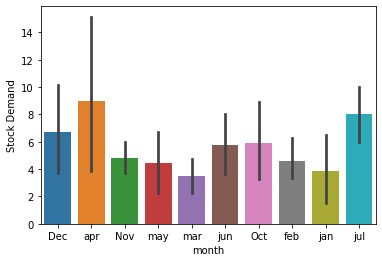

In [285]:
sns.barplot(prod_1_train['month'], prod_1_train['Stock Demand'])

In [292]:

prod_1_train.fillna(value = 0, inplace= True)
prod_1_test.fillna(value = 0, inplace = True)

In [296]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder() #transforms month column

prod_1_train['month'] = le.fit_transform(prod_1_train['month'])
prod_1_test['month'] = le.fit_transform(prod_1_test['month'])

rf_model = RandomForestRegressor()
rf_model.fit(prod_1_train[['month',
 'count- 1',
 'count- 2',
 'count- 3',
 'count- 4',
 'count- 5',
 'count- 6',
 'count- 7',
 'count- 8',
 'count- 9',
 'count- 10',
 'count- 11',
 'count- 12',
 'count- 13',
 'count- 14',
 'count- 15',
 'count- 16',
 'count- 17',
 'count- 18',
 'count- 19',
 'count- 20',
 'count- 21',
 'count- 22',
 'count- 23',
 'count- 24',
 'count- 25',
 'count- 26',
 'count- 27',
 'count- 28',
 'count- 29',
 'count- 30',
 'count- 31',
 'count- 32',
 'count- 33',
 'count- 34',
 'count- 35',
 'count- 36',
 'count- 37',
 'count- 38',
 'count- 39',
 'count- 40',
 'count- 41',
 'count- 42',
 'count- 43',
 'count- 44',
 'count- 45',
 'count- 46',
 'count- 47',
 'count- 48',
 'count- 49',
 'count- 50',
 'count- 51',
 'count- 52',
 'count- 53',
 'count- 54',
 'count- 55',
 'count- 56',
 'count- 57',
 'count- 58',
 'count- 59',
 'count- 60',
 'count- 61',
 'count- 62',
 'count- 63',
 'count- 64',
 'count- 65',
 'count- 66',
 'count- 67',
 'count- 68',
 'count- 69',
 'count- 70',
 'count- 71',
 'count- 72',
 'count- 73',
 'count- 74',
 'count- 75',
 'count- 76',
 'count- 77',
 'count- 78',
 'count- 79',
 'count- 80',
 'count- 81',
 'count- 82',
 'count- 83',
 'count- 84',
 'count- 85',
 'count- 86',
 'count- 87',
 'count- 88',
 'count- 89',
 'count- 90',
 'count- 91',
 'count- 92',
 'count- 93',
 'count- 94',
 'count- 95',
 'count- 96',
 'count- 97',
 'count- 98',
 'count- 99',
 'count- 100',
 'count- 101',
 'count- 102',
 'count- 103']], prod_1_train['Stock Demand'])


model = XGBRegressor()
model.fit(prod_1_train[['month',
 'count- 1',
 'count- 2',
 'count- 3',
 'count- 4',
 'count- 5',
 'count- 6',
 'count- 7',
 'count- 8',
 'count- 9',
 'count- 10',
 'count- 11',
 'count- 12',
 'count- 13',
 'count- 14',
 'count- 15',
 'count- 16',
 'count- 17',
 'count- 18',
 'count- 19',
 'count- 20',
 'count- 21',
 'count- 22',
 'count- 23',
 'count- 24',
 'count- 25',
 'count- 26',
 'count- 27',
 'count- 28',
 'count- 29',
 'count- 30',
 'count- 31',
 'count- 32',
 'count- 33',
 'count- 34',
 'count- 35',
 'count- 36',
 'count- 37',
 'count- 38',
 'count- 39',
 'count- 40',
 'count- 41',
 'count- 42',
 'count- 43',
 'count- 44',
 'count- 45',
 'count- 46',
 'count- 47',
 'count- 48',
 'count- 49',
 'count- 50',
 'count- 51',
 'count- 52',
 'count- 53',
 'count- 54',
 'count- 55',
 'count- 56',
 'count- 57',
 'count- 58',
 'count- 59',
 'count- 60',
 'count- 61',
 'count- 62',
 'count- 63',
 'count- 64',
 'count- 65',
 'count- 66',
 'count- 67',
 'count- 68',
 'count- 69',
 'count- 70',
 'count- 71',
 'count- 72',
 'count- 73',
 'count- 74',
 'count- 75',
 'count- 76',
 'count- 77',
 'count- 78',
 'count- 79',
 'count- 80',
 'count- 81',
 'count- 82',
 'count- 83',
 'count- 84',
 'count- 85',
 'count- 86',
 'count- 87',
 'count- 88',
 'count- 89',
 'count- 90',
 'count- 91',
 'count- 92',
 'count- 93',
 'count- 94',
 'count- 95',
 'count- 96',
 'count- 97',
 'count- 98',
 'count- 99',
 'count- 100',
 'count- 101',
 'count- 102',
 'count- 103']], prod_1_train['Stock Demand'])

output_rf = rf_model.predict(prod_1_test[['month',
 'count- 1',
 'count- 2',
 'count- 3',
 'count- 4',
 'count- 5',
 'count- 6',
 'count- 7',
 'count- 8',
 'count- 9',
 'count- 10',
 'count- 11',
 'count- 12',
 'count- 13',
 'count- 14',
 'count- 15',
 'count- 16',
 'count- 17',
 'count- 18',
 'count- 19',
 'count- 20',
 'count- 21',
 'count- 22',
 'count- 23',
 'count- 24',
 'count- 25',
 'count- 26',
 'count- 27',
 'count- 28',
 'count- 29',
 'count- 30',
 'count- 31',
 'count- 32',
 'count- 33',
 'count- 34',
 'count- 35',
 'count- 36',
 'count- 37',
 'count- 38',
 'count- 39',
 'count- 40',
 'count- 41',
 'count- 42',
 'count- 43',
 'count- 44',
 'count- 45',
 'count- 46',
 'count- 47',
 'count- 48',
 'count- 49',
 'count- 50',
 'count- 51',
 'count- 52',
 'count- 53',
 'count- 54',
 'count- 55',
 'count- 56',
 'count- 57',
 'count- 58',
 'count- 59',
 'count- 60',
 'count- 61',
 'count- 62',
 'count- 63',
 'count- 64',
 'count- 65',
 'count- 66',
 'count- 67',
 'count- 68',
 'count- 69',
 'count- 70',
 'count- 71',
 'count- 72',
 'count- 73',
 'count- 74',
 'count- 75',
 'count- 76',
 'count- 77',
 'count- 78',
 'count- 79',
 'count- 80',
 'count- 81',
 'count- 82',
 'count- 83',
 'count- 84',
 'count- 85',
 'count- 86',
 'count- 87',
 'count- 88',
 'count- 89',
 'count- 90',
 'count- 91',
 'count- 92',
 'count- 93',
 'count- 94',
 'count- 95',
 'count- 96',
 'count- 97',
 'count- 98',
 'count- 99',
 'count- 100',
 'count- 101',
 'count- 102',
 'count- 103']])
output = model.predict(prod_1_test[['month',
 'count- 1',
 'count- 2',
 'count- 3',
 'count- 4',
 'count- 5',
 'count- 6',
 'count- 7',
 'count- 8',
 'count- 9',
 'count- 10',
 'count- 11',
 'count- 12',
 'count- 13',
 'count- 14',
 'count- 15',
 'count- 16',
 'count- 17',
 'count- 18',
 'count- 19',
 'count- 20',
 'count- 21',
 'count- 22',
 'count- 23',
 'count- 24',
 'count- 25',
 'count- 26',
 'count- 27',
 'count- 28',
 'count- 29',
 'count- 30',
 'count- 31',
 'count- 32',
 'count- 33',
 'count- 34',
 'count- 35',
 'count- 36',
 'count- 37',
 'count- 38',
 'count- 39',
 'count- 40',
 'count- 41',
 'count- 42',
 'count- 43',
 'count- 44',
 'count- 45',
 'count- 46',
 'count- 47',
 'count- 48',
 'count- 49',
 'count- 50',
 'count- 51',
 'count- 52',
 'count- 53',
 'count- 54',
 'count- 55',
 'count- 56',
 'count- 57',
 'count- 58',
 'count- 59',
 'count- 60',
 'count- 61',
 'count- 62',
 'count- 63',
 'count- 64',
 'count- 65',
 'count- 66',
 'count- 67',
 'count- 68',
 'count- 69',
 'count- 70',
 'count- 71',
 'count- 72',
 'count- 73',
 'count- 74',
 'count- 75',
 'count- 76',
 'count- 77',
 'count- 78',
 'count- 79',
 'count- 80',
 'count- 81',
 'count- 82',
 'count- 83',
 'count- 84',
 'count- 85',
 'count- 86',
 'count- 87',
 'count- 88',
 'count- 89',
 'count- 90',
 'count- 91',
 'count- 92',
 'count- 93',
 'count- 94',
 'count- 95',
 'count- 96',
 'count- 97',
 'count- 98',
 'count- 99',
 'count- 100',
 'count- 101',
 'count- 102',
 'count- 103']])

error_rf = mean_squared_error(prod_1_test['Stock Demand'], output_rf)
error = mean_squared_error(prod_1_test['Stock Demand'], output )
error,error_rf
#retry with standardization
#Try RandomForest because of low training data

(25.41289425145051, 25.648409375)

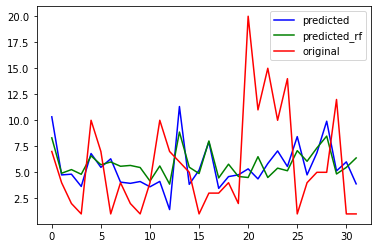

In [299]:
#Comparing the performance of the model

from cProfile import label


plt.plot(output , 'b', label = 'predicted')
plt.plot(output_rf, 'g', label = 'predicted_rf' )
plt.plot(range(len(prod_1_test['Stock Demand'])),prod_1_test['Stock Demand'], 'r', label = 'original')
plt.legend(loc ='best')


/Users/max/Desktop/Code/nlp_venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='Stock Demand'>

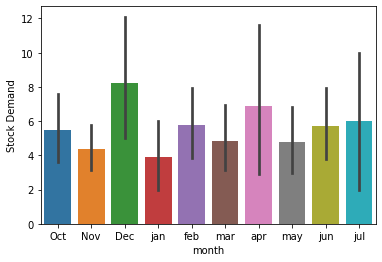

In [22]:
sns.barplot(prod_1['month'], prod_1['Stock Demand'])

In [ ]:
#Hyperparameter tuning
#Cross-validation